# Calibration of the deflection of a tube

## Description

We consider the deflection of a tube under a vertical stress.

<img src="simply_supported_beam.png" width="300" />

The parameters of the model are:

* F : the strength,
* L : the length of the tube,
* a : position of the force,
* D : external diameter of the tube,
* d : internal diameter of the tube,
* E : Young modulus.

The following figure presents the internal and external diameter of the tube:

<img src="tube-diameters.png" width="200" />

The area moment of inertia of the cross section about the neutral axis of a round tube (i.e. perpendicular to the section) with external and internal diameters $D$ and $d$ are:
$$
I = \frac{\pi (D^4-d^4)}{32}.
$$

The vertical deflection at point $x=a$ is:
$$
g_1(X) = 
- F \frac{a^2 (L-a)^2}{3 E L I},
$$

where $X=(F,L,a,D,d,E)$. 
The angle of the tube at the left end is:
$$
g_2(X) = 
- F \frac{b (L^2-b^2)}{6 E L I},
$$

and the angle of the tube at the right end is:
$$
g_3(X) = 
F \frac{a (L^2-a^2)}{6 E L I}.
$$

The following table presents the distributions of the random variables. These variables are assumed to be independent.

|Variable|Distribution|
|--|--|
|F|Normal(1,0.1)|
|L|Normal(1.5,0.01)|
|a|Uniform(0.7,1.2)|
|D|Triangular(0.75,0.8,0.85)|
|d|Triangular(0.09,0.1,0.11)|
|E|Normal(200000,2000)|


## References

* Deflection of beams by Russ Elliott. http://www.clag.org.uk/beam.html
* https://upload.wikimedia.org/wikipedia/commons/f/ff/Simple_beam_with_offset_load.svg
* https://en.wikipedia.org/wiki/Deflection_(engineering)
* https://mechanicalc.com/reference/beam-deflection-tables
* https://en.wikipedia.org/wiki/Second_moment_of_area
* Shigley's Mechanical Engineering Design (9th Edition), Richard G. Budynas, J. Keith Nisbettn, McGraw Hill (2011)
* Mechanics of Materials (7th Edition), James M. Gere, Barry J. Goodno, Cengage Learning (2009)
* Statics and Mechanics of Materials (5th Edition), Ferdinand Beer, E. Russell Johnston, Jr., John DeWolf, David Mazurek. Mc Graw Hill (2011) Chapter 15: deflection of beams.

## Create a calibration problem

In [1]:
import openturns as ot

We use the variable names `De` for the external diameter and `di` for the internal diameter because the symbolic function engine is not case sensitive, hence the variable names `D` and `d` would not be distiguished.

In [2]:
inputsvars=["F","L","a","De","di","E"]
formula = "var I:=pi_*(De^4-di^4)/32; var b:=L-a; g1:=-F*a^2*(L-a)^2/(3*E*L*I); g2:=-F*b*(L^2-b^2)/(6*E*L*I); g3:=F*a*(L^2-a^2)/(6*E*L*I)"
g = ot.SymbolicFunction(inputsvars,["g1","g2","g3"],formula)
g.setOutputDescription(["Deflection","Left angle","Right angle"])

In [3]:
XF=ot.Normal(1,0.1)
XE=ot.Normal(200000,2000)
XF.setDescription(["Force"])
XE.setDescription(["Young Modulus"])

In [4]:
XL = ot.Dirac(1.5)
Xa = ot.Dirac(1.0)
XD = ot.Dirac(0.8)
Xd = ot.Dirac(0.1)
XL.setDescription(["Longueur"])
Xa.setDescription(["Location"])
XD.setDescription(["External diameter"])
Xd.setDescription(["Internal diameter"])

In [5]:
inputDistribution = ot.ComposedDistribution([XF,XL,Xa,XD,Xd,XE])

In [6]:
sampleSize = 100
inputSample = inputDistribution.getSample(sampleSize)
inputSample[0:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=6 description=[Force,Longueur,Location,External diameter,Internal diameter,Young Modulus] data=[[1.06082,1.5,1,0.8,0.1,196966],[0.873383,1.5,1,0.8,0.1,197401],[0.956173,1.5,1,0.8,0.1,200461],[1.12055,1.5,1,0.8,0.1,193805],[0.781861,1.5,1,0.8,0.1,200026]]

In [7]:
outputDeflection = g(inputSample)
outputDeflection[0:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=3 description=[Deflection,Left angle,Right angle] data=[[-7.44259e-06,-1.48852e-05,1.86065e-05],[-6.11404e-06,-1.22281e-05,1.52851e-05],[-6.59145e-06,-1.31829e-05,1.64786e-05],[-7.98985e-06,-1.59797e-05,1.99746e-05],[-5.40152e-06,-1.0803e-05,1.35038e-05]]

In [8]:
observationNoiseSigma = [0.1e-6,0.05e-5,0.05e-5]
observationNoiseCovariance = ot.CovarianceMatrix(3)
for i in range(3):
    observationNoiseCovariance[i,i] = observationNoiseSigma[i]**2

In [9]:
noiseSigma = ot.Normal([0.,0.,0.],observationNoiseCovariance)
sampleObservationNoise = noiseSigma.getSample(sampleSize)
observedOutput = outputDeflection + sampleObservationNoise
observedOutput[0:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=3 description=[Deflection,Left angle,Right angle] data=[[-7.35676e-06,-1.53385e-05,1.81481e-05],[-5.99772e-06,-1.20771e-05,1.55303e-05],[-6.54391e-06,-1.35773e-05,1.61439e-05],[-8.00364e-06,-1.64655e-05,1.93807e-05],[-5.2587e-06,-1.10977e-05,1.26377e-05]]

In [10]:
observedInput = ot.Sample(sampleSize,2)
observedInput[:,0] = inputSample[:,0] # F
observedInput[:,1] = inputSample[:,5] # E
observedInput.setDescription(["Force","Young Modulus"])
observedInput[0:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=2 description=[Force,Young Modulus] data=[[1.06082,196966],[0.873383,197401],[0.956173,200461],[1.12055,193805],[0.781861,200026]]

In [11]:
fullSample = ot.Sample(sampleSize,5)
fullSample[:,0:2] = observedInput
fullSample[:,2:5] = observedOutput
fullSample.setDescription(["Force","Young","Deflection","Left Angle","Right Angle"])
fullSample[0:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=5 description=[Force,Young,Deflection,Left Angle,Right Angle] data=[[1.06082,196966,-7.35676e-06,-1.53385e-05,1.81481e-05],[0.873383,197401,-5.99772e-06,-1.20771e-05,1.55303e-05],[0.956173,200461,-6.54391e-06,-1.35773e-05,1.61439e-05],[1.12055,193805,-8.00364e-06,-1.64655e-05,1.93807e-05],[0.781861,200026,-5.2587e-06,-1.10977e-05,1.26377e-05]]

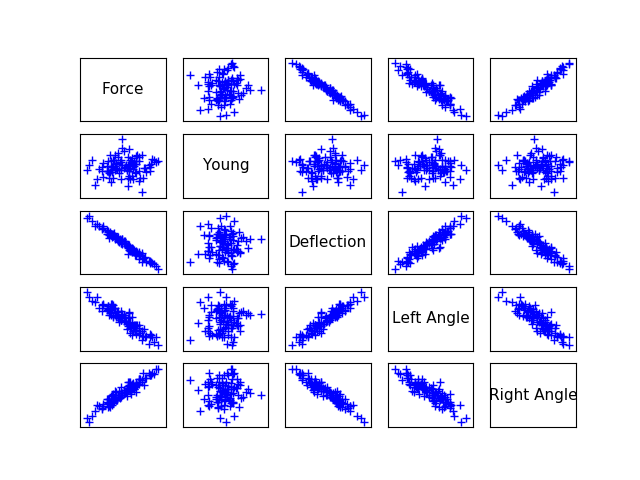

In [12]:
ot.Pairs(fullSample)

## Setting up the calibration

In [13]:
XL = 1.4 # Exact : 1.5
Xa = 1.2 # Exact : 1.0
XD = 0.7 # Exact : 0.8
Xd = 0.2 # Exact : 0.1
thetaPrior = ot.Point([XL,Xa,XD,Xd])


In [14]:
sigmaXL = 0.1 * XL
sigmaXa = 0.1 * Xa
sigmaXD = 0.1 * XD
sigmaXd = 0.1 * Xd
parameterCovariance = ot.CovarianceMatrix(4)
parameterCovariance[0,0] = sigmaXL**2
parameterCovariance[1,1] = sigmaXa**2
parameterCovariance[2,2] = sigmaXD**2
parameterCovariance[3,3] = sigmaXd**2
parameterCovariance

class=CovarianceMatrix dimension=4 implementation=class=MatrixImplementation name=Unnamed rows=4 columns=4 values=[0.0196,0,0,0,0,0.0144,0,0,0,0,0.0049,0,0,0,0,0.0004]

In [15]:
calibratedIndices = [1,2,3,4]
calibrationFunction = ot.ParametricFunction(g, calibratedIndices, thetaPrior)

In [16]:
sigmaObservation = [0.2e-6,0.03e-5,0.03e-5] # Exact : 0.1e-6

In [17]:
errorCovariance = ot.CovarianceMatrix(3)
errorCovariance[0,0] = sigmaObservation[0]**2
errorCovariance[1,1] = sigmaObservation[1]**2
errorCovariance[2,2] = sigmaObservation[2]**2

In [18]:
calibrationFunction.setParameter(thetaPrior)
predictedOutput = calibrationFunction(observedInput)
predictedOutput[0:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=3 description=[Deflection,Left angle,Right angle] data=[[-3.15453e-06,-1.05151e-05,1.70871e-05],[-2.59143e-06,-8.6381e-06,1.40369e-05],[-2.79378e-06,-9.3126e-06,1.5133e-05],[-3.38649e-06,-1.12883e-05,1.83435e-05],[-2.28943e-06,-7.63143e-06,1.24011e-05]]

## A visualisation class

In [19]:
"""
A graphics class to analyze the results of calibration.
"""

import pylab as pl
import openturns as ot
import openturns.viewer as otv

class CalibrationAnalysis:
    def __init__(self,calibrationResult,model,inputObservations,outputObservations):
        """
        Plots the prior and posterior distribution of the calibrated parameter theta.
    
        Parameters
        ----------
        calibrationResult : :class:`~openturns.calibrationResult`
            The result of a calibration.
    
        model : 2-d sequence of float
            The function to calibrate.
    
        inputObservations : :class:`~openturns.Sample`
            The sample of input values of the model linked to the observations.
    
        outputObservations : 2-d sequence of float
            The sample of output values of the model linked to the observations.
        """
        self.model = model
        self.outputAtPrior = None
        self.outputAtPosterior = None
        self.calibrationResult = calibrationResult
        self.observationColor = "blue"
        self.priorColor = "red"
        self.posteriorColor = "green"
        self.inputObservations = inputObservations
        self.outputObservations = outputObservations
        self.unitlength = 6 # inch
        # Compute yAtPrior
        meanPrior = calibrationResult.getParameterPrior().getMean()
        model.setParameter(meanPrior)
        self.outputAtPrior=model(inputObservations)
        # Compute yAtPosterior
        meanPosterior = calibrationResult.getParameterPosterior().getMean()
        model.setParameter(meanPosterior)
        self.outputAtPosterior=model(inputObservations)
        return None

    def drawParameterDistributions(self):
        """
        Plots the prior and posterior distribution of the calibrated parameter theta.
        """
        thetaPrior = self.calibrationResult.getParameterPrior()
        thetaDescription = thetaPrior.getDescription()
        thetaPosterior = self.calibrationResult.getParameterPosterior()
        thetaDim = thetaPosterior.getDimension()
        fig = pl.figure(figsize=(12, 4))
        for i in range(thetaDim):
            graph = ot.Graph("",thetaDescription[i],"PDF",True,"topright")
            # Prior distribution
            thetaPrior_i = thetaPrior.getMarginal(i)
            priorPDF = thetaPrior_i.drawPDF()
            priorPDF.setColors([self.priorColor])
            priorPDF.setLegends(["Prior"])
            graph.add(priorPDF)
            # Posterior distribution
            thetaPosterior_i = thetaPosterior.getMarginal(i)
            postPDF = thetaPosterior_i.drawPDF()
            postPDF.setColors([self.posteriorColor])
            postPDF.setLegends(["Posterior"])
            graph.add(postPDF)
            '''
            If the prior is a Dirac, set the vertical axis bounds to the posterior. 
            Otherwise, the Dirac set to [0,1], where the 1 can be much larger 
            than the maximum PDF of the posterior.
            '''
            if (thetaPrior_i.getName()=="Dirac"):
                # The vertical (PDF) bounds of the posterior
                postbb = postPDF.getBoundingBox()
                pdf_upper = postbb.getUpperBound()[1]
                pdf_lower = postbb.getLowerBound()[1]
                # Set these bounds to the graph
                bb = graph.getBoundingBox()
                graph_upper = bb.getUpperBound()
                graph_upper[1] = pdf_upper
                bb.setUpperBound(graph_upper)
                graph_lower = bb.getLowerBound()
                graph_lower[1] = pdf_lower
                bb.setLowerBound(graph_lower)
                graph.setBoundingBox(bb)
            # Add it to the graphics
            ax = fig.add_subplot(1, thetaDim, i+1)
            _ = otv.View(graph, figure=fig, axes=[ax])
        return fig
    
    def drawObservationsVsPredictions(self):
        """
        Plots the output of the model depending 
        on the output observations before and after calibration.
        """
        
        ySize = self.outputObservations.getSize()
        yDim = self.outputObservations.getDimension()
        graph = ot.Graph("","Observations","Predictions",True,"topleft")
        # Plot the diagonal
        if (yDim==1):
            graph = self._drawObservationsVsPredictions1Dimension(self.outputObservations,self.outputAtPrior,self.outputAtPosterior)
        elif (ySize==1):
            outputObservations = ot.Sample(self.outputObservations[0],1)
            outputAtPrior = ot.Sample(self.outputAtPrior[0],1)
            outputAtPosterior = ot.Sample(self.outputAtPosterior[0],1)
            graph = self._drawObservationsVsPredictions1Dimension(outputObservations,outputAtPrior,outputAtPosterior)
        else:
            fig = pl.figure(figsize=(self.unitlength*yDim, self.unitlength))
            for i in range(yDim):
                outputObservations = self.outputObservations[:,i]
                outputAtPrior = self.outputAtPrior[:,i]
                outputAtPosterior = self.outputAtPosterior[:,i]
                graph = self._drawObservationsVsPredictions1Dimension(outputObservations,outputAtPrior,outputAtPosterior)
                ax = fig.add_subplot(1, yDim, i+1)
                _ = otv.View(graph, figure=fig, axes=[ax])

        return graph

    def _drawObservationsVsPredictions1Dimension(self,outputObservations,outputAtPrior,outputAtPosterior):
        """
        Plots the output of the model depending 
        on the output observations before and after calibration.
        Can manage only 1D samples.
        """
        yDim = outputObservations.getDimension()
        ydescription = outputObservations.getDescription()
        xlabel = "%s Observations" % (ydescription[0])
        ylabel = "%s Predictions" % (ydescription[0])
        graph = ot.Graph("",xlabel,ylabel,True,"topleft")
        # Plot the diagonal
        if (yDim==1):
            curve = ot.Curve(outputObservations, outputObservations)
            curve.setColor(self.observationColor)
            graph.add(curve)
        else:
            raise TypeError('Output observations are not 1D.')
        # Plot the predictions before
        yPriorDim = outputAtPrior.getDimension()
        if (yPriorDim==1):
            cloud = ot.Cloud(outputObservations, outputAtPrior)
            cloud.setColor(self.priorColor)
            cloud.setLegend("Prior")
            graph.add(cloud)
        else:
            raise TypeError('Output prior predictions are not 1D.')
        # Plot the predictions after
        yPosteriorDim = outputAtPosterior.getDimension()
        if (yPosteriorDim==1):
            cloud = ot.Cloud(outputObservations, outputAtPosterior)
            cloud.setColor(self.posteriorColor)
            cloud.setLegend("Posterior")
            graph.add(cloud)
        else:
            raise TypeError('Output posterior predictions are not 1D.')
        return graph
    
    def drawResiduals(self):
        """
        Plot the distribution of the residuals and 
        the distribution of the observation errors. 
        """    
        ySize = self.outputObservations.getSize()
        yDim = self.outputObservations.getDimension()
        yPriorSize = self.outputAtPrior.getSize()
        yPriorDim = self.outputAtPrior.getDimension()
        if (yDim==1):
            observationsError = self.calibrationResult.getObservationsError()
            graph = self._drawResiduals1Dimension(self.outputObservations,self.outputAtPrior,self.outputAtPosterior,observationsError)
        elif (ySize==1):
            outputObservations = ot.Sample(self.outputObservations[0],1)
            outputAtPrior = ot.Sample(self.outputAtPrior[0],1)
            outputAtPosterior = ot.Sample(self.outputAtPosterior[0],1)
            observationsError = self.calibrationResult.getObservationsError()
            # In this case, we cannot draw observationsError ; just 
            # pass the required input argument, but it is not actually used.
            graph = self._drawResiduals1Dimension(outputObservations,outputAtPrior,outputAtPosterior,observationsError)
        else:
            observationsError = self.calibrationResult.getObservationsError()
            fig = pl.figure(figsize=(self.unitlength*yDim, self.unitlength))
            for i in range(yDim):
                outputObservations = self.outputObservations[:,i]
                outputAtPrior = self.outputAtPrior[:,i]
                outputAtPosterior = self.outputAtPosterior[:,i]
                observationsErrorYi = observationsError.getMarginal(i)
                graph = self._drawResiduals1Dimension(outputObservations,outputAtPrior,outputAtPosterior,observationsErrorYi)
                ax = fig.add_subplot(1, yDim, i+1)
                _ = otv.View(graph, figure=fig, axes=[ax])
        return graph

    def _drawResiduals1Dimension(self,outputObservations,outputAtPrior,outputAtPosterior,observationsError):
        """
        Plot the distribution of the residuals and 
        the distribution of the observation errors. 
        Can manage only 1D samples.
        """    
        ydescription = outputObservations.getDescription()
        xlabel = "%s Residuals" % (ydescription[0])
        graph = ot.Graph("Residuals analysis",xlabel,"Probability distribution function",True,"topright")
        yDim = outputObservations.getDimension()
        yPriorDim = outputAtPrior.getDimension()
        yPosteriorDim = outputAtPrior.getDimension()
        if (yDim==1) and (yPriorDim==1) :
            posteriorResiduals = outputObservations - outputAtPrior
            kernel = ot.KernelSmoothing()
            fittedDist = kernel.build(posteriorResiduals)
            residualPDF = fittedDist.drawPDF()
            residualPDF.setColors([self.priorColor])
            residualPDF.setLegends(["Prior"])
            graph.add(residualPDF)
        else:
            raise TypeError('Output prior observations are not 1D.')
        if (yDim==1) and (yPosteriorDim==1) :
            posteriorResiduals = outputObservations - outputAtPosterior
            kernel = ot.KernelSmoothing()
            fittedDist = kernel.build(posteriorResiduals)
            residualPDF = fittedDist.drawPDF()
            residualPDF.setColors([self.posteriorColor])
            residualPDF.setLegends(["Posterior"])
            graph.add(residualPDF)
        else:
            raise TypeError('Output posterior observations are not 1D.')
        # Plot the distribution of the observation errors
        if (observationsError.getDimension()==1):
            # In the other case, we just do not plot
            obserrgraph = observationsError.drawPDF()
            obserrgraph.setColors([self.observationColor])
            obserrgraph.setLegends(["Observation errors"])
            graph.add(obserrgraph)
        return graph

    def drawObservationsVsInputs(self):
        """
        Plots the observed output of the model depending 
        on the observed input before and after calibration.
        """
        xSize = self.inputObservations.getSize()
        ySize = self.outputObservations.getSize()
        xDim = self.inputObservations.getDimension()
        yDim = self.outputObservations.getDimension()
        xdescription = self.inputObservations.getDescription()
        ydescription = self.outputObservations.getDescription()
        # Observations
        if (xDim==1) and (yDim==1):
            graph = self._drawObservationsVsInputs1Dimension(self.inputObservations,self.outputObservations,self.outputAtPrior,self.outputAtPosterior)
        elif (xSize==1) and (ySize==1):
            inputObservations = ot.Sample(self.inputObservations[0],1)
            outputObservations = ot.Sample(self.outputObservations[0],1)
            outputAtPrior = ot.Sample(self.outputAtPrior[0],1)
            outputAtPosterior = ot.Sample(self.outputAtPosterior[0],1)
            graph = self._drawObservationsVsInputs1Dimension(inputObservations,outputObservations,outputAtPrior,outputAtPosterior)
        else:
            fig = pl.figure(figsize=(xDim*self.unitlength, yDim*self.unitlength))
            for i in range(xDim):
                for j in range(yDim):
                    k = xDim * j + i
                    inputObservations = self.inputObservations[:,i]
                    outputObservations = self.outputObservations[:,j]
                    outputAtPrior = self.outputAtPrior[:,j]
                    outputAtPosterior = self.outputAtPosterior[:,j]
                    graph = self._drawObservationsVsInputs1Dimension(inputObservations,outputObservations,outputAtPrior,outputAtPosterior)
                    ax = fig.add_subplot(yDim, xDim, k+1)
                    _ = otv.View(graph, figure=fig, axes=[ax])
        return graph

    def _drawObservationsVsInputs1Dimension(self,inputObservations,outputObservations,outputAtPrior,outputAtPosterior):
        """
        Plots the observed output of the model depending 
        on the observed input before and after calibration.
        Can manage only 1D samples.
        """
        xDim = inputObservations.getDimension()
        if (xDim!=1):
            raise TypeError('Input observations are not 1D.')
        yDim = outputObservations.getDimension()
        xdescription = inputObservations.getDescription()
        ydescription = outputObservations.getDescription()
        graph = ot.Graph("",xdescription[0],ydescription[0],True,"topright")
        # Observations
        if (yDim==1):
            cloud = ot.Cloud(inputObservations,outputObservations)
            cloud.setColor(self.observationColor)
            cloud.setLegend("Observations")
            graph.add(cloud)
        else:
            raise TypeError('Output observations are not 1D.')
        # Model outputs before calibration
        yPriorDim = outputAtPrior.getDimension()
        if (yPriorDim==1):
            cloud = ot.Cloud(inputObservations,outputAtPrior)
            cloud.setColor(self.priorColor)
            cloud.setLegend("Prior")
            graph.add(cloud)
        else:
            raise TypeError('Output prior predictions are not 1D.')
        # Model outputs after calibration
        yPosteriorDim = outputAtPosterior.getDimension()
        if (yPosteriorDim==1):
            cloud = ot.Cloud(inputObservations,outputAtPosterior)
            cloud.setColor(self.posteriorColor)
            cloud.setLegend("Posterior")
            graph.add(cloud)
        else:
            raise TypeError('Output posterior predictions are not 1D.')
        return graph

## Calibration with gaussian non linear least squares

In [20]:
algo = ot.GaussianNonLinearCalibration(calibrationFunction, observedInput, observedOutput, thetaPrior, parameterCovariance, errorCovariance)

In [21]:
algo.run()

In [22]:
calibrationResult = algo.getResult()

## Analysis of the results

In [23]:
thetaMAP = calibrationResult.getParameterMAP()
thetaMAP

class=Point name=Unnamed dimension=4 values=[1.49042,0.991571,0.798252,0.199874]

Compute a 95% confidence interval for each marginal.

In [24]:
thetaPosterior = calibrationResult.getParameterPosterior()
alpha = 0.95
dim = thetaPosterior.getDimension()
for i in range(dim):
    print(thetaPosterior.getMarginal(i).computeBilateralConfidenceInterval(alpha))

[1.4721, 1.514]
[0.969123, 1.02096]
[0.794538, 0.802743]
[0.199868, 0.199879]


In [25]:
mypcr = CalibrationAnalysis(calibrationResult,calibrationFunction, observedInput, observedOutput)

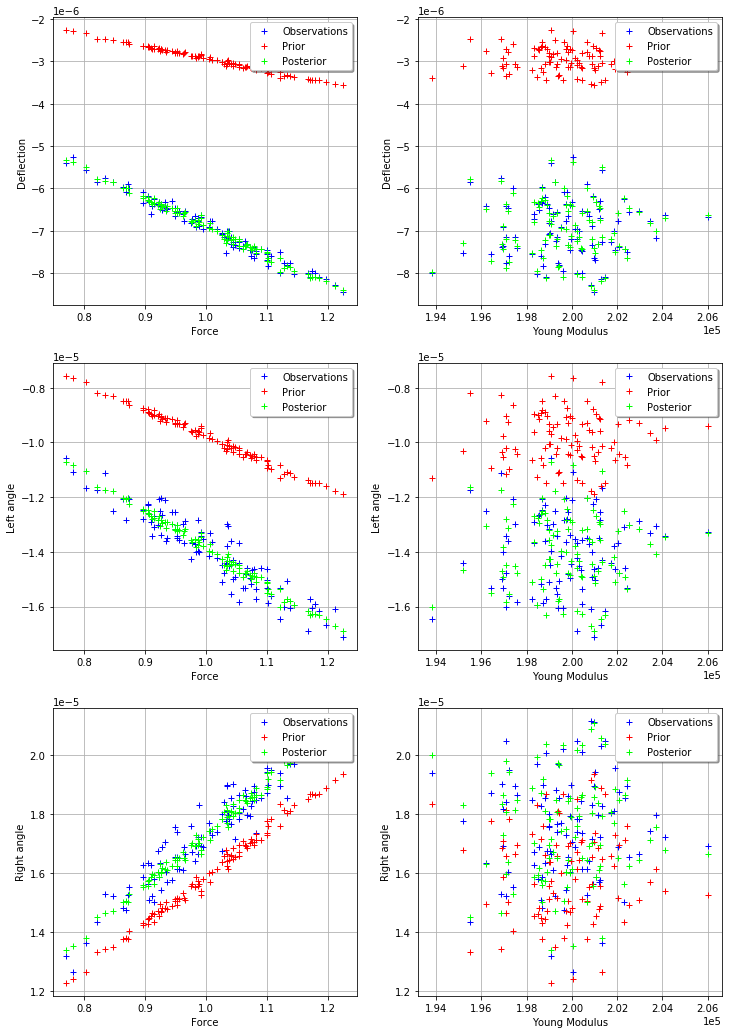

In [26]:
_ = mypcr.drawObservationsVsInputs()

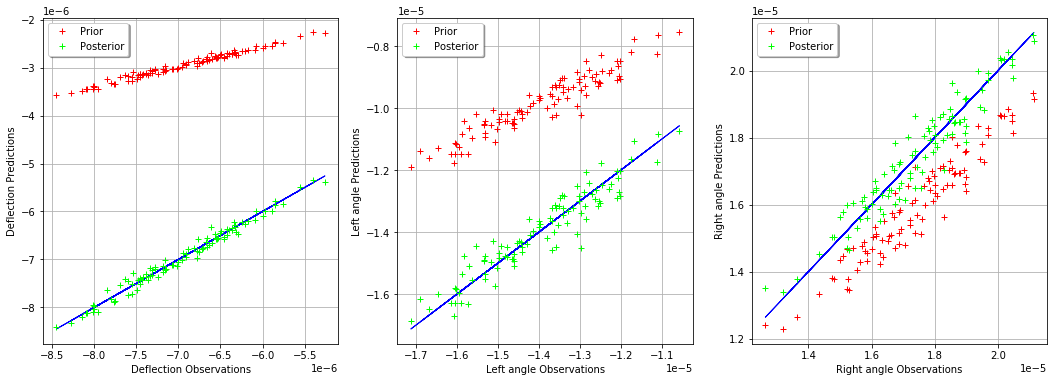

In [27]:
_ = mypcr.drawObservationsVsPredictions()

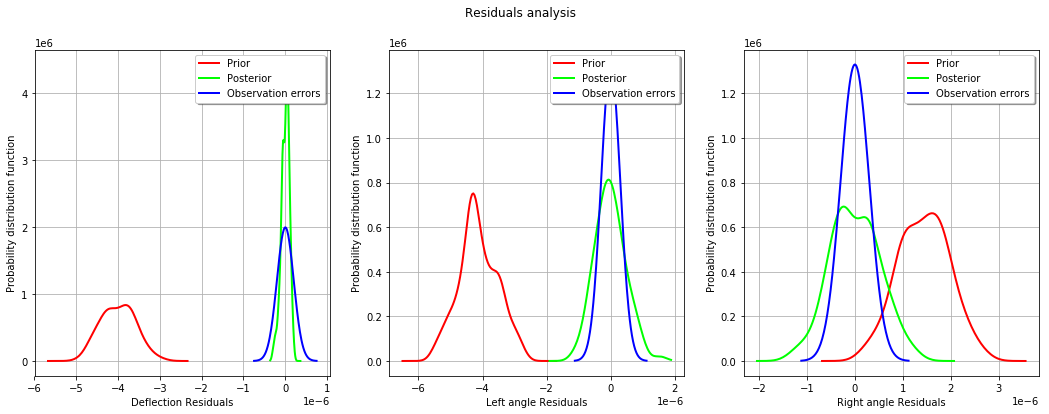

In [28]:
_ = mypcr.drawResiduals()

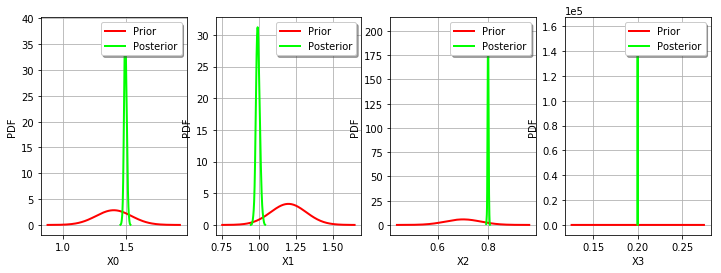

In [29]:
_ = mypcr.drawParameterDistributions()